In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# from pandas.core.common import SettingWithCopyWarning
# warnings.simplefilter(action="ignore", category=FutureWarning)
# warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid", 
              palette="colorblind", color_codes=True, 
              rc={"figure.figsize": [12, 8]})

In [2]:
import pandas as pd 
import yfinance as yf
import talib

In [3]:
df = yf.download("IBM",start="2020-01-01",end="2020-12-31",progress=False,auto_adjust=True)

In [4]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,103.085733,103.788248,102.910110,103.406448,3293436
2020-01-03,101.993765,102.978812,101.986130,102.581741,2482890
2020-01-06,101.879240,102.505388,101.711247,102.398491,2537073
2020-01-07,102.085415,103.055185,101.863974,102.467209,3232977
2020-01-08,102.711564,103.742424,102.261039,103.322441,4545916
...,...,...,...,...,...
2020-12-23,99.555416,100.624266,99.442906,99.571487,2817819
2020-12-24,100.455524,100.535890,99.820646,100.206390,1842111
2020-12-28,100.535871,101.741332,100.021539,100.310852,3781499


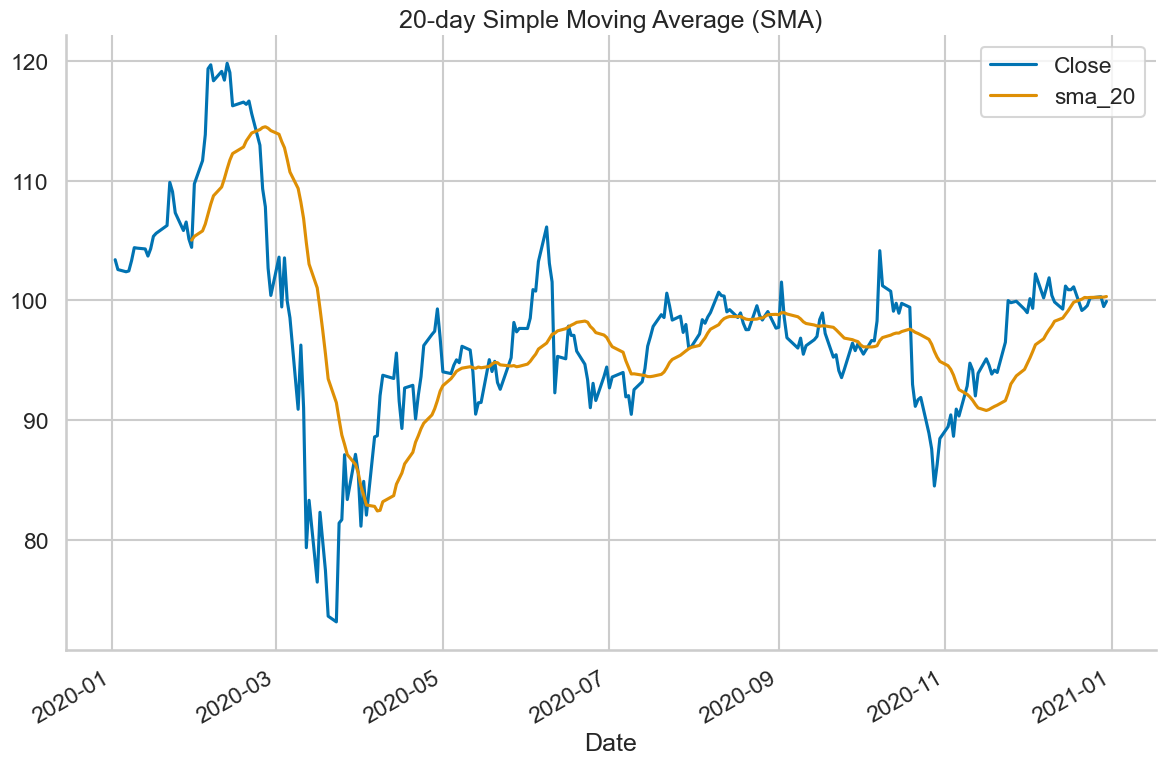

In [5]:
df["sma_20"] = talib.SMA(df["Close"], timeperiod=20)
(
    df[["Close", "sma_20"]]
    .plot(title="20-day Simple Moving Average (SMA)")
)

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_5_1", dpi=200)

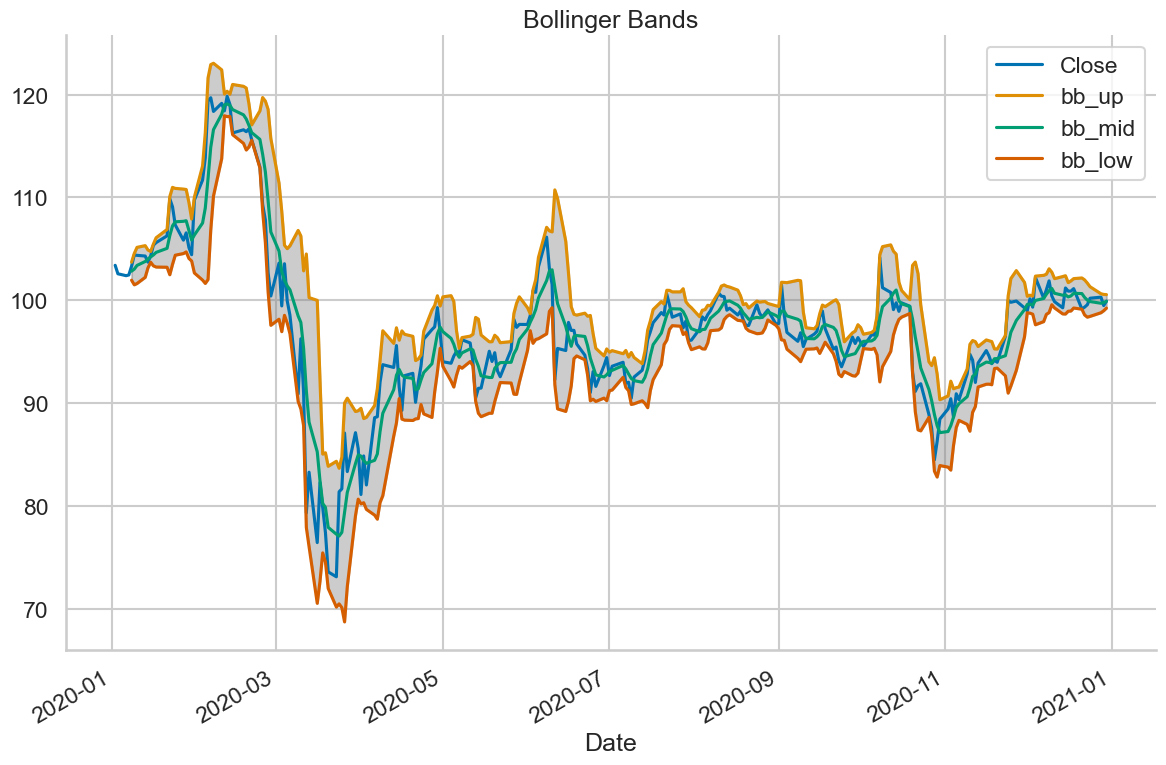

In [6]:
df["bb_up"], df["bb_mid"], df["bb_low"] = talib.BBANDS(df["Close"])

fig, ax = plt.subplots()

(
    df.loc[:, ["Close", "bb_up", "bb_mid", "bb_low"]]
    .plot(ax=ax, title="Bollinger Bands")
)

ax.fill_between(df.index, df["bb_low"], df["bb_up"], 
                color="gray", 
                alpha=.4)

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_5_2", dpi=200)

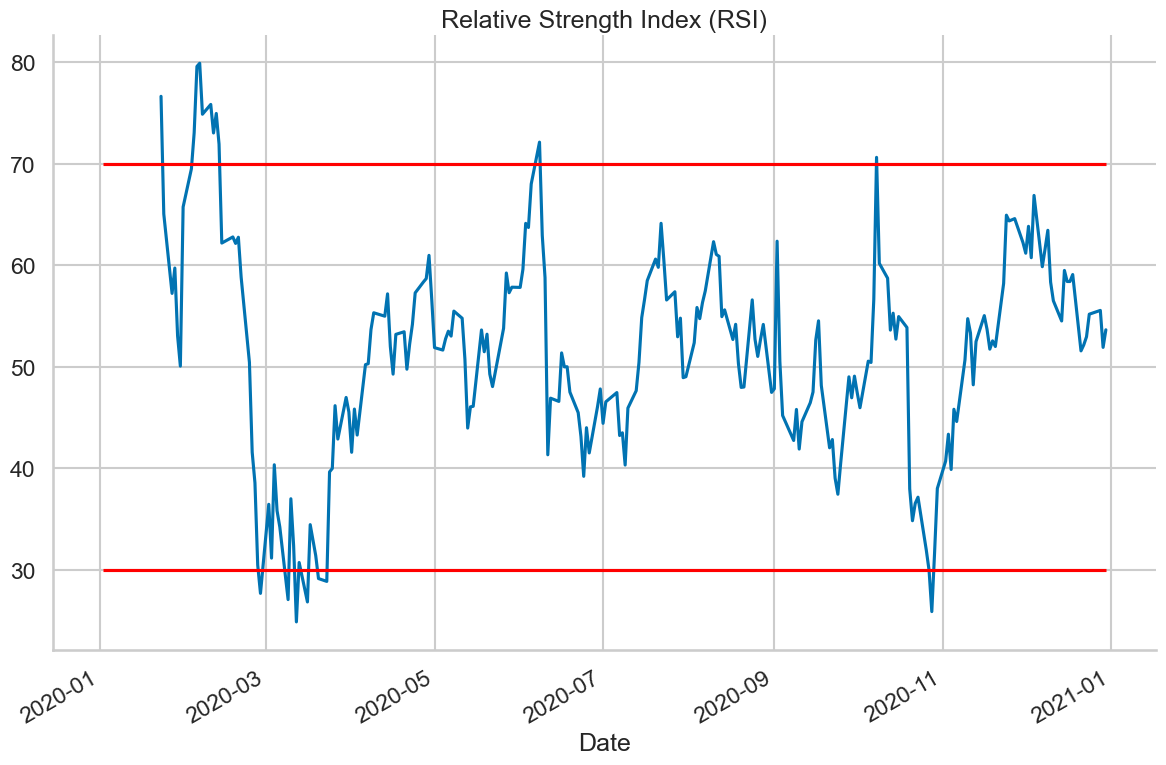

In [7]:
df["rsi"] = talib.RSI(df["Close"])

fig, ax = plt.subplots()
df["rsi"].plot(ax=ax, 
               title="Relative Strength Index (RSI)")
ax.hlines(y=30, 
          xmin=df.index.min(), 
          xmax=df.index.max(), 
          color="red")
ax.hlines(y=70, 
          xmin=df.index.min(), 
          xmax=df.index.max(), 
          color="red")

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_5_3", dpi=200)

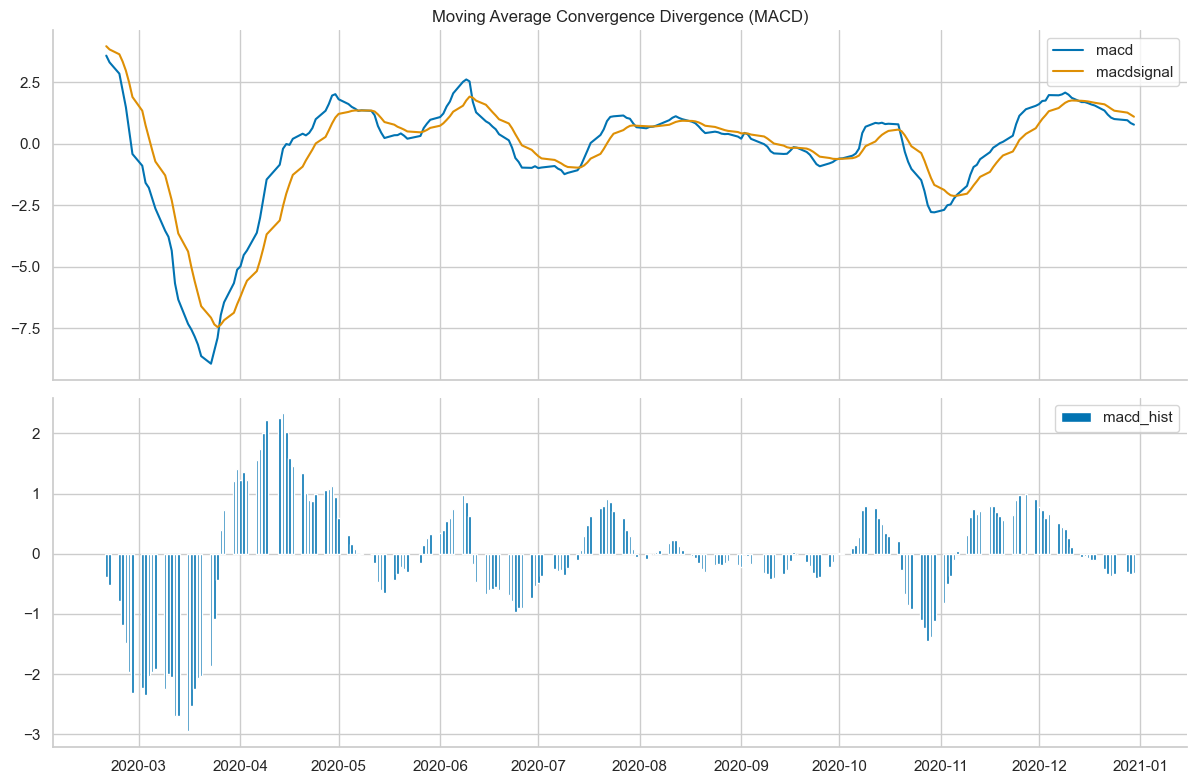

In [8]:
df["macd"], df["macdsignal"], df["macdhist"] = talib.MACD(
    df["Close"], fastperiod=12, slowperiod=26, signalperiod=9
)

with sns.plotting_context("notebook"):
    fig, ax = plt.subplots(2, 1, sharex=True)

    (
        df[["macd", "macdsignal"]].
        plot(ax=ax[0],
             title="Moving Average Convergence Divergence (MACD)")
    )
    ax[1].bar(df.index, df["macdhist"].values, label="macd_hist")
    ax[1].legend()

    sns.despine()
    plt.tight_layout()
    # plt.savefig("images/figure_5_4", dpi=200)


### There's more

In [9]:
from ta import add_all_ta_features


2. Discard the previously calculated indicators and keep only the required columns:

In [10]:
df2 = df[["Open", "High", "Low", "Close", "Volume"]].copy()

In [11]:
df

,Open,High,Low,Close,Volume,sma_20,bb_up,bb_mid,bb_low,rsi,macd,macdsignal,macdhist
Date,,,,,,,,,,,,,
2020-01-02,103.085733,103.788248,102.910110,103.406448,3293436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,101.993765,102.978812,101.986130,102.581741,2482890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,101.879240,102.505388,101.711247,102.398491,2537073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,102.085415,103.055185,101.863974,102.467209,3232977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,102.711564,103.742424,102.261039,103.322441,4545916,NaN,103.708926,102.835266,101.961606,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,99.555416,100.624266,99.442906,99.571487,2817819,100.230481,101.676523,100.021533,98.366544,52.981214,1.061546,1.427202,-0.365656
2020-12-24,100.455524,100.535890,99.820646,100.206390,1842111,100.250171,101.324158,99.883310,98.442462,55.201693,1.003672,1.342496,-0.338824
2020-12-28,100.535871,101.741332,100.021539,100.310852,3781499,100.269057,100.640830,99.717761,98.794692,55.573445,0.955225,1.265042,-0.309817


3. Calculate all the technical indicators available in the `ta` library:

In [12]:
df2 = add_all_ta_features(df2, open="Open", high="High", 
                         low="Low", close="Close", 
                         volume="Volume")

/home/yair/bin/miniconda3/lib/python3.11/site-packages/ta/trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


In [13]:
df2.shape

(252, 91)

In [14]:
df2.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'volume_adi', 'volume_obv',
       'volume_cmf', 'volume_fi', 'volume_em', 'volume_sma_em', 'volume_vpt',
       'volume_vwap', 'volume_mfi', 'volume_nvi', 'volatility_bbm',
       'volatility_bbh', 'volatility_bbl', 'volatility_bbw', 'volatility_bbp',
       'volatility_bbhi', 'volatility_bbli', 'volatility_kcc',
       'volatility_kch', 'volatility_kcl', 'volatility_kcw', 'volatility_kcp',
       'volatility_kchi', 'volatility_kcli', 'volatility_dcl',
       'volatility_dch', 'volatility_dcm', 'volatility_dcw', 'volatility_dcp',
       'volatility_atr', 'volatility_ui', 'trend_macd', 'trend_macd_signal',
       'trend_macd_diff', 'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast',
       'trend_ema_slow', 'trend_vortex_ind_pos', 'trend_vortex_ind_neg',
       'trend_vortex_ind_diff', 'trend_trix', 'trend_mass_index', 'trend_dpo',
       'trend_kst', 'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',
       'trend_ichimoku_base

In [15]:
import mplfinance as mpf


2. Download Bitcoin's hourly prices from the last 3 months:

In [16]:
df3 = yf.download("BTC-USD",  period="6mo",  interval="1h", progress=False)
df3

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-03-07 16:00:00+00:00,67342.585938,67521.640625,67111.296875,67341.539062,67341.539062,0
2024-03-07 17:00:00+00:00,67373.718750,67995.359375,67345.843750,67622.570312,67622.570312,462524416
2024-03-07 18:00:00+00:00,67663.937500,67857.375000,67527.968750,67677.960938,67677.960938,0
2024-03-07 19:00:00+00:00,67700.625000,67870.890625,67333.882812,67573.101562,67573.101562,0
2024-03-07 20:00:00+00:00,67589.281250,68007.218750,67589.281250,67658.468750,67658.468750,0
...,...,...,...,...,...,...
2024-09-07 12:00:00+00:00,54372.730469,54650.730469,54372.730469,54604.003906,54604.003906,8699904
2024-09-07 13:00:00+00:00,54572.468750,54652.933594,54425.347656,54523.929688,54523.929688,5066752
2024-09-07 14:00:00+00:00,54538.988281,54668.390625,54499.285156,54610.812500,54610.812500,0


3. Identify the "Three Line Strike" pattern:

In [17]:
df3["3_line_strike"] = talib.CDL3LINESTRIKE(
    df3["Open"], df3["High"], df3["Low"], df3["Close"]
)

4. Locate and plot the bearish pattern:

In [18]:
df3[df3["3_line_strike"] == -100].head().round(2)

,Open,High,Low,Close,Adj Close,Volume,3_line_strike
Datetime,,,,,,,
2024-03-23 11:00:00+00:00,64329.33,64623.18,64265.14,64623.18,64623.18,0,-100
2024-03-31 00:00:00+00:00,69647.74,69975.79,69647.74,69896.41,69896.41,147933184,-100
2024-04-14 22:00:00+00:00,63728.07,65499.00,63728.07,65352.49,65352.49,0,-100
2024-04-20 23:00:00+00:00,64668.43,65012.58,64668.43,65012.58,65012.58,0,-100
2024-04-27 17:00:00+00:00,62735.11,63546.51,62735.11,63425.40,63425.40,243118080,-100


/home/yair/bin/miniconda3/lib/python3.11/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


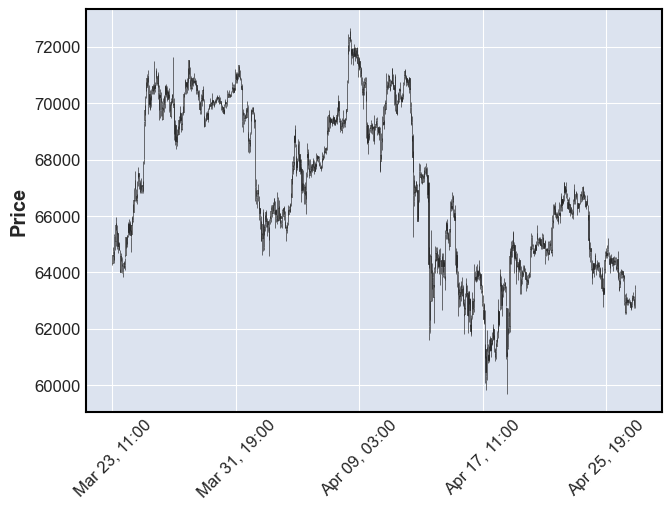

In [19]:
mpf.plot(df3["2024-03-23 11:00:00+00:00":"2024-04-27 17:00:00+00:00"], 
         type="candle")

5. Locate and plot the bullish pattern:

In [20]:
df3[df3["3_line_strike"] == 100].head().round(2)

,Open,High,Low,Close,Adj Close,Volume,3_line_strike
Datetime,,,,,,,
2024-03-08 21:00:00+00:00,69280.91,69310.95,68148.60,68384.72,68384.72,566198272,100
2024-03-12 14:00:00+00:00,72286.52,72825.66,71726.44,71739.73,71739.73,1324093440,100
2024-03-21 13:00:00+00:00,67261.33,67641.56,66700.07,66742.77,66742.77,0,100
2024-05-19 12:00:00+00:00,67340.88,67340.88,66853.35,66884.02,66884.02,413936640,100
2024-05-21 13:00:00+00:00,71313.08,71313.08,70553.12,70553.12,70553.12,1424961536,100


/home/yair/bin/miniconda3/lib/python3.11/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


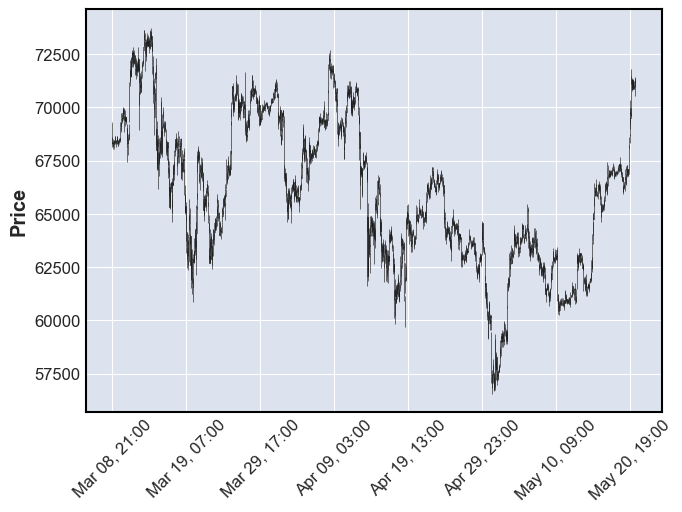

In [21]:
mpf.plot(df3["2024-03-08 21:00:00+00:00":"2024-05-21 13:00:00+00:00"], 
         type="candle")

### candle names

In [22]:
candle_names = talib.get_function_groups()["Pattern Recognition"]

In [23]:
for candle in candle_names:
    df3[candle] = getattr(talib, candle)(df3["Open"], df3["High"], 
                                        df3["Low"], df3["Close"])

In [24]:
with pd.option_context("display.max_rows", len(candle_names)):
    display(df3[candle_names].describe().transpose().round(2))

,count,mean,std,min,25%,50%,75%,max
CDL2CROWS,4417.0,-0.07,2.61,-100.0,0.0,0.0,0.0,0.0
CDL3BLACKCROWS,4417.0,-0.09,3.01,-100.0,0.0,0.0,0.0,0.0
CDL3INSIDE,4417.0,0.29,11.16,-100.0,0.0,0.0,0.0,100.0
CDL3LINESTRIKE,4417.0,0.07,7.82,-100.0,0.0,0.0,0.0,100.0
CDL3OUTSIDE,4417.0,0.20,22.87,-100.0,0.0,0.0,0.0,100.0
CDL3STARSINSOUTH,4417.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
CDL3WHITESOLDIERS,4417.0,0.11,3.36,0.0,0.0,0.0,0.0,100.0
CDLABANDONEDBABY,4417.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
CDLADVANCEBLOCK,4417.0,-0.88,9.36,-100.0,0.0,0.0,0.0,0.0
CDLBELTHOLD,4417.0,-0.36,43.25,-100.0,0.0,0.0,0.0,100.0


4. Locate and plot the "Evening Star" pattern:

In [25]:
df3[df3["CDLEVENINGSTAR"]  == -100].head()

,Open,High,Low,Close,Adj Close,Volume,3_line_strike,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,...,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-03-15 08:00:00+00:00,68403.148438,68524.593750,67083.515625,67223.843750,67223.843750,1664606208,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-04-01 14:00:00+00:00,69896.562500,69944.992188,68662.765625,68928.359375,68928.359375,1692936192,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-04-24 02:00:00+00:00,66783.390625,66783.390625,66489.648438,66569.640625,66569.640625,98531328,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100
2024-05-06 10:00:00+00:00,65161.468750,65249.792969,63890.164062,64092.960938,64092.960938,1510389760,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-05-13 21:00:00+00:00,63091.152344,63104.300781,62842.394531,62875.984375,62875.984375,0,0,-100,0,0,...,0,0,0,0,0,0,0,0,0,0


/home/yair/bin/miniconda3/lib/python3.11/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


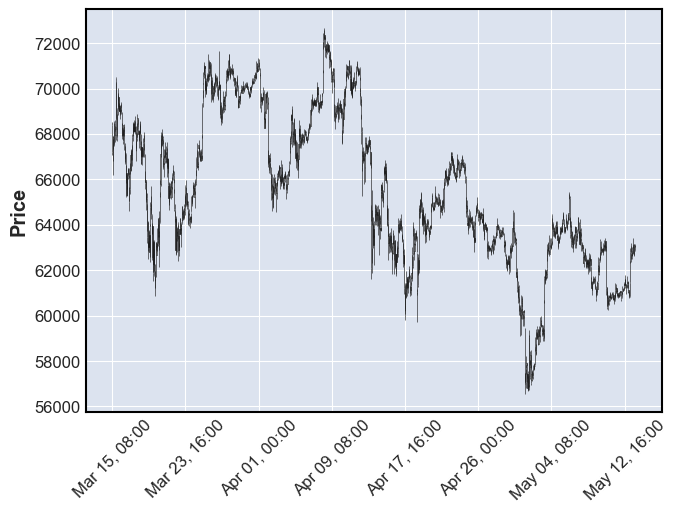

In [26]:
mpf.plot(df3["2024-03-15 08:00:00+00:00":"2024-05-13 21:00:00+00:00"], type="candle")